In [11]:
"""
Exp05B: Vol_targeting under transaction cost

Goal:
- Test if vol_targeting improves strategy implementability under execution frictions.


Fixed:
- Asset: SPY
- Execution: next-bar
- Signal: fixed
- Risk-off gate: Off
- Vol_targeting: On, parameter fixed
- Regime / sample: same as Exp05A


Sweep: Transaction cost: cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005,0.01]
- realistic: 0 / 1 / 2 / 5 bps
- moderate: 10 / 20 bps
- stress: 50 / 100 bps

"""

'\nExp05B: Vol_targeting under transaction cost\n\nGoal:\n- Test if vol_targeting improves strategy implementability under execution frictions.\n\n\nFixed:\n- Asset: SPY\n- Execution: next-bar\n- Signal: fixed\n- Risk-off gate: Off\n- Vol_targeting: On, parameter fixed\n- Regime / sample: same as Exp05A\n\n\nSweep: Transaction cost: cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005,0.01]\n- realistic: 0 / 1 / 2 / 5 bps\n- moderate: 10 / 20 bps\n- stress: 50 / 100 bps\n\n'

In [12]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [13]:
import pandas as pd
from runner import run

In [14]:
# Sweep: transaction cost(cost_rate)
from copy import deepcopy
from config import Config
from dataclasses import replace


cfg_base = replace(Config(), 
                   RISK_MODE="vol_target", # # Exp03A: isolate vol_target effect (risk-off gate: off)
                   MA_WINDOW=80,   # 和Exp02同
                   VOL_LOOKBACK = 20,
                   TARGET_VOL_ANNUAL = 0.15,
                   USE_RISK_OFF_GATE=False # risk-off gate: off
                  )  


cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01]
# realistic: 0 / 1 / 2 / 5 bps
# moderate: 10 / 20 bps
# stress: 50 / 100 bps


rows = []

risk_modes = ["none", "vol_target"] 

for c in cost_rate:
    cfg_c = replace(cfg_base, COST_RATE=c)


    for risk_mode in risk_modes:
        cfg_tmp = replace(cfg_c, RISK_MODE=risk_mode)
        
        _, summary = run(cfg_tmp)
        summary["COST_RATE"] = c # dict
        summary["RISK_MODE"] = risk_mode # dict
        rows.append(summary)

exp05 = pd.DataFrame(rows).sort_values(["RISK_MODE","COST_RATE"]) # 汇总成一个 实验结果表（experiment table）

exp05


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,COST_RATE,RISK_MODE
0,0.081822,-0.169437,0.765314,108.000000,2436,0.0000,none
2,0.080603,-0.171760,0.755142,108.000000,2436,0.0001,none
4,0.079386,-0.174077,0.744963,108.000000,2436,0.0002,none
6,0.075741,-0.180989,0.714391,108.000000,2436,0.0005,none
8,0.069690,-0.192385,0.663331,108.000000,2436,0.0010,none
10,0.057683,-0.214722,0.560935,108.000000,2436,0.0020,none
12,0.022393,-0.284311,0.253966,108.000000,2436,0.0050,none
14,-0.034047,-0.444878,-0.241740,108.000000,2436,0.0100,none
1,0.074558,-0.151951,0.762660,102.732187,2436,0.0000,vol_target
3,0.073405,-0.154012,0.752032,102.732187,2436,0.0001,vol_target


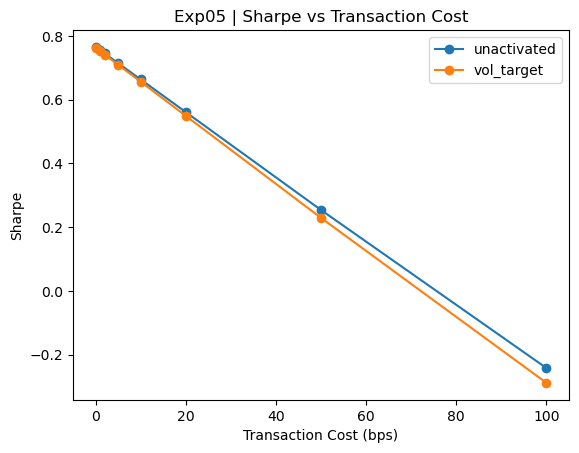

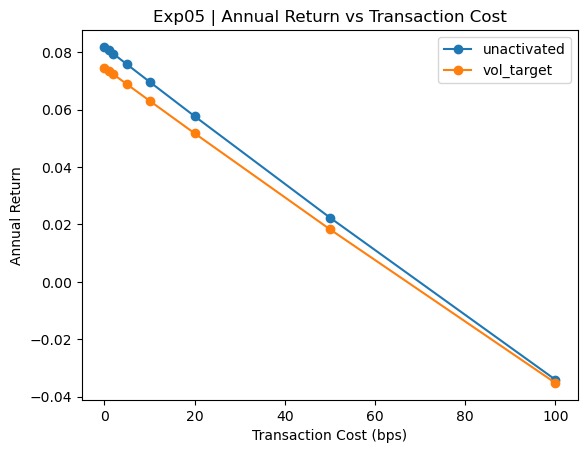

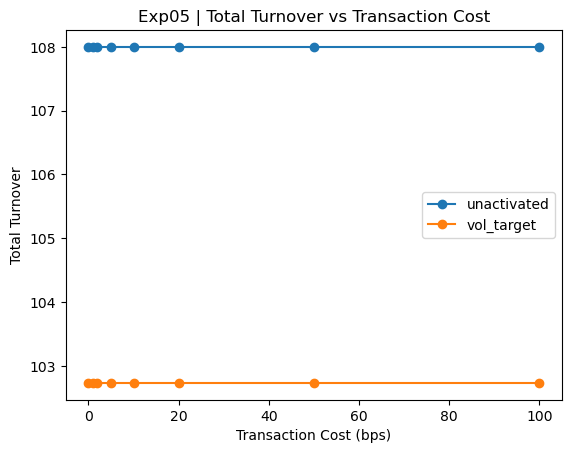

In [15]:
import matplotlib.pyplot as plt

# --- helper: make sure COST_BPS exists ---
if "COST_BPS" not in exp05.columns:
    exp05["COST_BPS"] = exp05["COST_RATE"] * 1e4

# --- split two modes ---
df_none = exp05[exp05["RISK_MODE"] == 'none'].sort_values("COST_BPS")
df_vt   = exp05[exp05["RISK_MODE"] == 'vol_target'].sort_values("COST_BPS")

# 1) Sharpe vs Cost (bps)
plt.figure()
plt.plot(df_none["COST_BPS"], df_none["Sharpe"], marker="o", label="unactivated")
plt.plot(df_vt["COST_BPS"],   df_vt["Sharpe"],   marker="o", label="vol_target")
plt.title("Exp05 | Sharpe vs Transaction Cost")
plt.xlabel("Transaction Cost (bps)")
plt.ylabel("Sharpe")
plt.legend()
plt.show()

# 2) Annual Return vs Cost (bps)
plt.figure()
plt.plot(df_none["COST_BPS"], df_none["Annual Return"], marker="o", label="unactivated")
plt.plot(df_vt["COST_BPS"],   df_vt["Annual Return"],   marker="o", label="vol_target")
plt.title("Exp05 | Annual Return vs Transaction Cost")
plt.xlabel("Transaction Cost (bps)")
plt.ylabel("Annual Return")
plt.legend()
plt.show()

# 3) Total Turnover vs Cost (bps)
plt.figure()
plt.plot(df_none["COST_BPS"], df_none["Total Turnover"], marker="o", label="unactivated")
plt.plot(df_vt["COST_BPS"],   df_vt["Total Turnover"],   marker="o", label="vol_target")
plt.title("Exp05 | Total Turnover vs Transaction Cost")
plt.xlabel("Transaction Cost (bps)")
plt.ylabel("Total Turnover")
plt.legend()
plt.show()
